# Multi Linear Regression

# Model #1 No Transformation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df=df.rename(columns={"R&D Spend":"R_and_D_Spend","Marketing Spend":"Marketing_Spend"})

In [5]:
df

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_and_D_Spend    50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df[df.duplicated()].shape

(0, 5)

# Check for Duplicate Values

In [9]:
df[df.duplicated()] # No Duplicate Records

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit


# Check for Outliers

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <BarContainer object of 10 artists>)

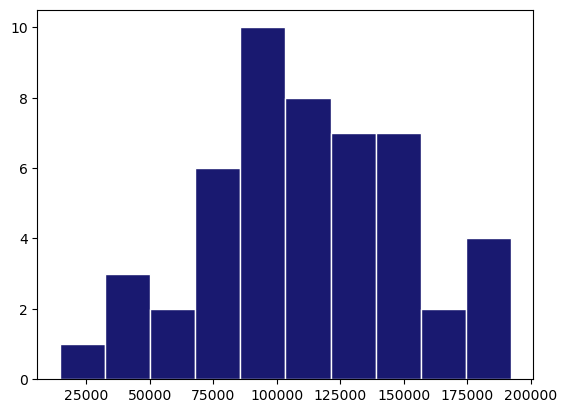

In [10]:
plt.hist(df['Profit'],color='midnightblue',edgecolor='w') 

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

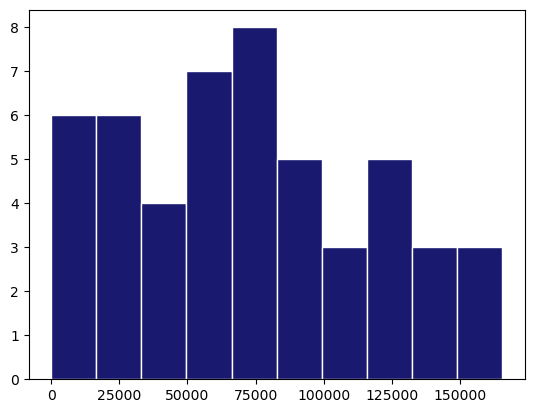

In [11]:
plt.hist(df['R_and_D_Spend'],color='midnightblue',edgecolor='w') 

(array([ 2.,  1.,  3.,  7.,  7., 12.,  4., 11.,  2.,  1.]),
 array([ 51283.14 ,  64419.382,  77555.624,  90691.866, 103828.108,
        116964.35 , 130100.592, 143236.834, 156373.076, 169509.318,
        182645.56 ]),
 <BarContainer object of 10 artists>)

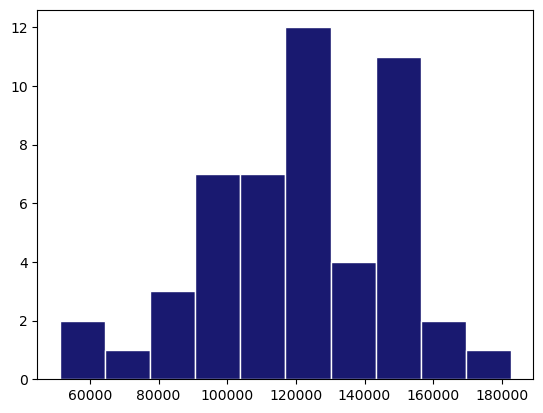

In [12]:
plt.hist(df['Administration'],color='midnightblue',edgecolor='w') 

(array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <BarContainer object of 10 artists>)

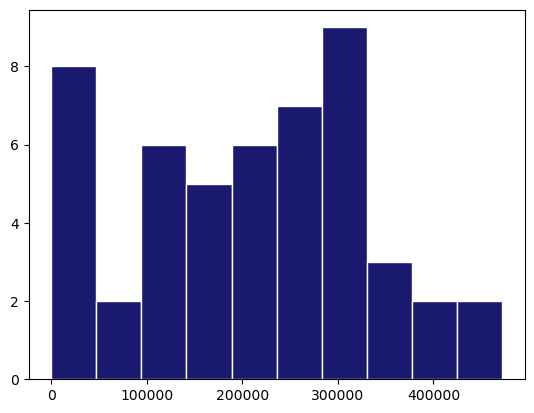

In [13]:
plt.hist(df['Marketing_Spend'],color='midnightblue',edgecolor='w') 

(array([17.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0., 16.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

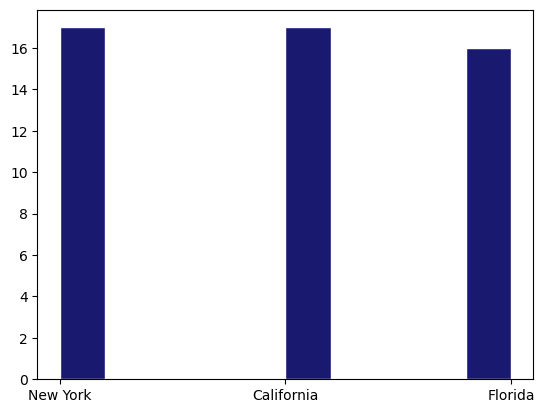

In [14]:
plt.hist(df['State'],color='midnightblue',edgecolor='w') 

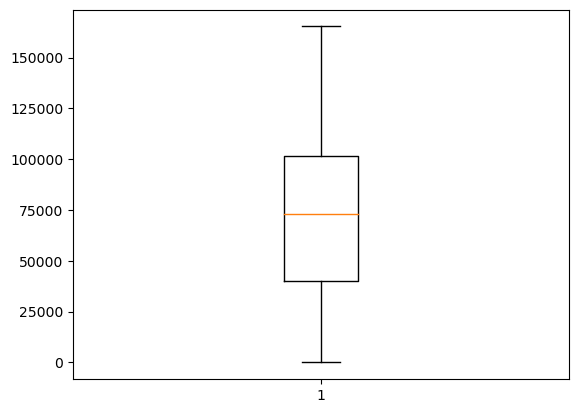

In [15]:
data_box=df.dropna()
data_box1=data_box.R_and_D_Spend
plt.boxplot(data_box1)
plt.show()

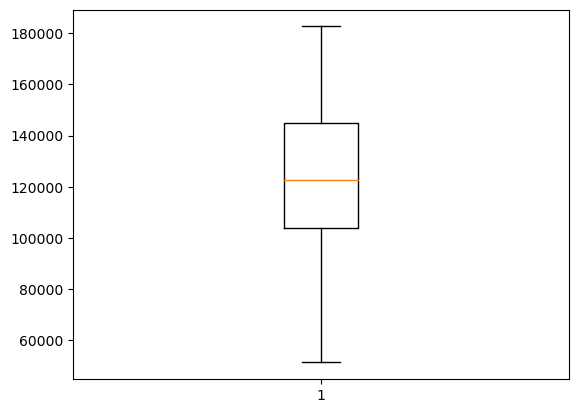

In [16]:
data_box=df.dropna()
data_box2=data_box.Administration
plt.boxplot(data_box2)
plt.show()

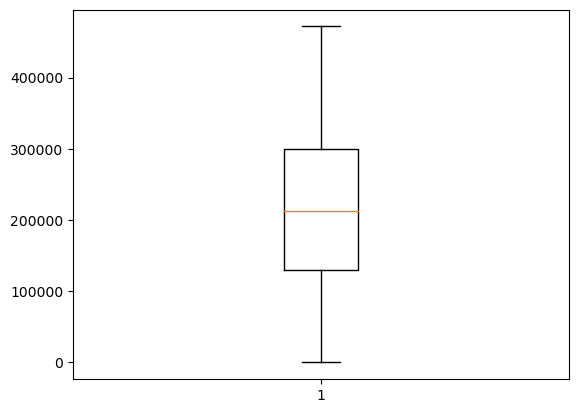

In [17]:
data_box=df.dropna()
data_box3=data_box.Marketing_Spend
plt.boxplot(data_box3)
plt.show()

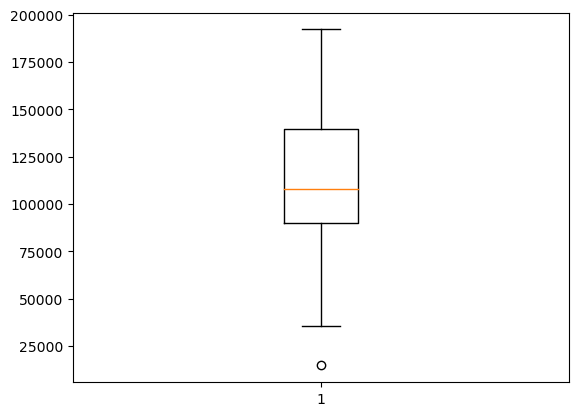

In [18]:
data_box=df.dropna()
data_box4=data_box.Profit
plt.boxplot(data_box4)
plt.show()

In [19]:
df

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [20]:
#Outlier present in Profit Column

In [21]:
X=df[["R_and_D_Spend","Administration","Marketing_Spend"]]
y=df[["Profit"]]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred=model.predict(X_test)

In [25]:
y_pred

array([[126703.02716461],
       [ 84894.75081556],
       [ 98893.41815974],
       [ 46501.70815036],
       [129128.39734381],
       [ 50992.69486261],
       [109016.5536578 ],
       [100878.4641454 ],
       [ 97700.59638629],
       [113106.15292226]])

In [26]:
y_test

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [27]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)

In [28]:
df

,Actual,Prediction
0,134307.35,126703.027165
1,81005.76,84894.750816
2,99937.59,98893.418160
3,64926.08,46501.708150
4,125370.37,129128.397344
5,35673.41,50992.694863
6,105733.54,109016.553658
7,107404.34,100878.464145
8,97427.84,97700.596386
9,122776.86,113106.152922


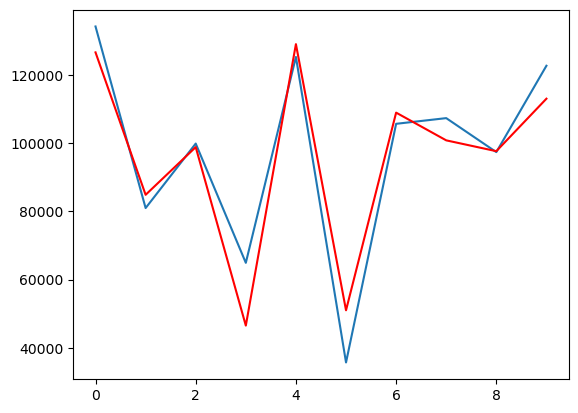

In [29]:
plt.plot(df["Actual"])
plt.plot(df["Prediction"],c="r")

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
r2_score(y_pred,y_test)*100

88.65921975655436

# Model #2 Lograthmic Transformation

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv('50_Startups.csv')

In [34]:
df=df.rename(columns={"R&D Spend":"R_and_D_Spend","Marketing Spend":"Marketing_Spend"})

In [35]:
df.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
X=df[["R_and_D_Spend","Administration","Marketing_Spend"]]
y=df[["Profit"]]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [39]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred=model2.predict(X_test)

In [41]:
y_pred

array([[11.68126116],
       [11.26187471],
       [11.38753665],
       [10.86055758],
       [11.70866913],
       [10.90688154],
       [11.49168649],
       [11.4123333 ],
       [11.36951018],
       [11.51418682]])

In [42]:
y_test

,Profit
13,11.807886
39,11.302276
30,11.512301
45,11.081005
17,11.739028
48,10.482161
26,11.568677
25,11.584356
32,11.486867
19,11.718124


In [43]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)

In [44]:
df

,Actual,Prediction
0,11.807886,11.681261
1,11.302276,11.261875
2,11.512301,11.387537
3,11.081005,10.860558
4,11.739028,11.708669
5,10.482161,10.906882
6,11.568677,11.491686
7,11.584356,11.412333
8,11.486867,11.369510
9,11.718124,11.514187


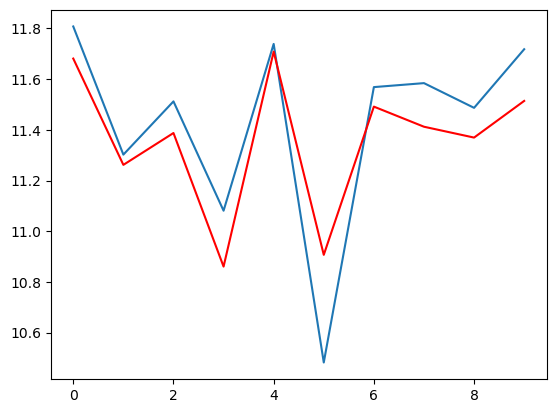

In [45]:
plt.plot(df["Actual"])
plt.plot(df["Prediction"],c="r")

In [46]:
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
r2_score(y_pred,y_test)*100

51.759461501421534

# Model #3 Sqrt Transformation

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('50_Startups.csv')

In [50]:
df=df.rename(columns={"R&D Spend":"R_and_D_Spend","Marketing Spend":"Marketing_Spend"})

In [51]:
df.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_and_D_Spend    50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [53]:
X=df[["R_and_D_Spend","Administration","Marketing_Spend"]]
y=df[["Profit"]]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
y_train = np.sqrt(y_train)
y_test = np.sqrt(y_test)

In [56]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred=model3.predict(X_test)

In [58]:
y_pred

array([[350.56692468],
       [286.18848082],
       [307.18247417],
       [226.200654  ],
       [354.38531048],
       [233.4301726 ],
       [322.80584335],
       [310.33367359],
       [305.0842621 ],
       [328.4489666 ]])

In [59]:
y_test

,Profit
13,366.479672
39,284.615109
30,316.129072
45,254.805965
17,354.076785
48,188.874059
26,325.166942
25,327.726014
32,312.134330
19,350.395291


In [60]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)

In [61]:
df

,Actual,Prediction
0,366.479672,350.566925
1,284.615109,286.188481
2,316.129072,307.182474
3,254.805965,226.200654
4,354.076785,354.385310
5,188.874059,233.430173
6,325.166942,322.805843
7,327.726014,310.333674
8,312.134330,305.084262
9,350.395291,328.448967


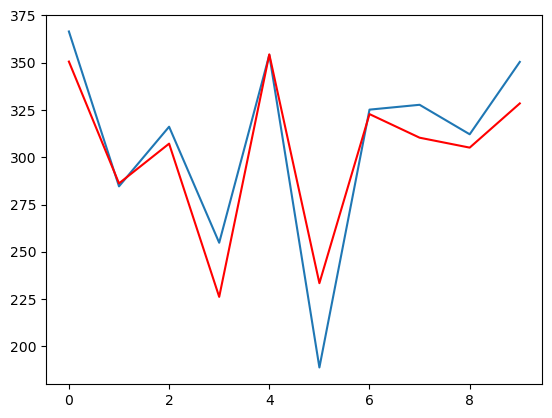

In [62]:
plt.plot(df["Actual"])
plt.plot(df["Prediction"],c="r")

In [63]:
from sklearn.metrics import r2_score,mean_squared_error

In [64]:
r2_score(y_pred,y_test)*100

76.6456438926875

In [65]:
r2_values = {'Model 1': 88.65, 'Model 2': 51.75, 'Model 3': 76.64}

df = pd.DataFrame(list(r2_values.items()), columns=['Model', 'R2'])

print(df)

     Model     R2
0  Model 1  88.65
1  Model 2  51.75
2  Model 3  76.64
